<a href="https://colab.research.google.com/github/ramapu12/trabajoFinal/blob/main/trabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-90b90facfc1a>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Life expectancy ', y='Country', data=top, palette='Greens_r', ax=ax_top)
<ipython-input-8-90b90facfc1a>:32: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-90b90facfc1a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Life expectancy ', y='Country', data=bottom, palette='Reds', ax=ax_bottom)
<ipython-input-8-90b90facfc1a>:39: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/gradio/processing_utils.py:158: UserWarning: Glyph 128994 (\N{

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9de2204d9e285d1870.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


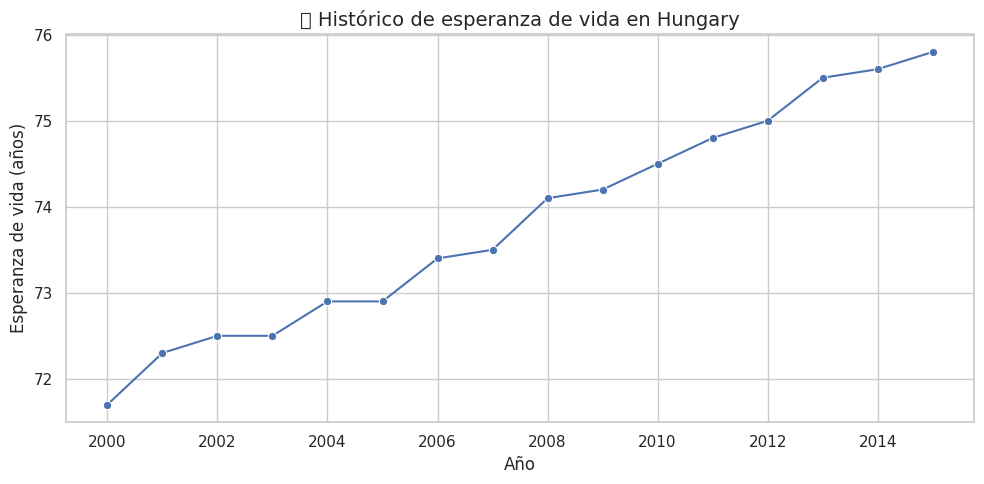

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


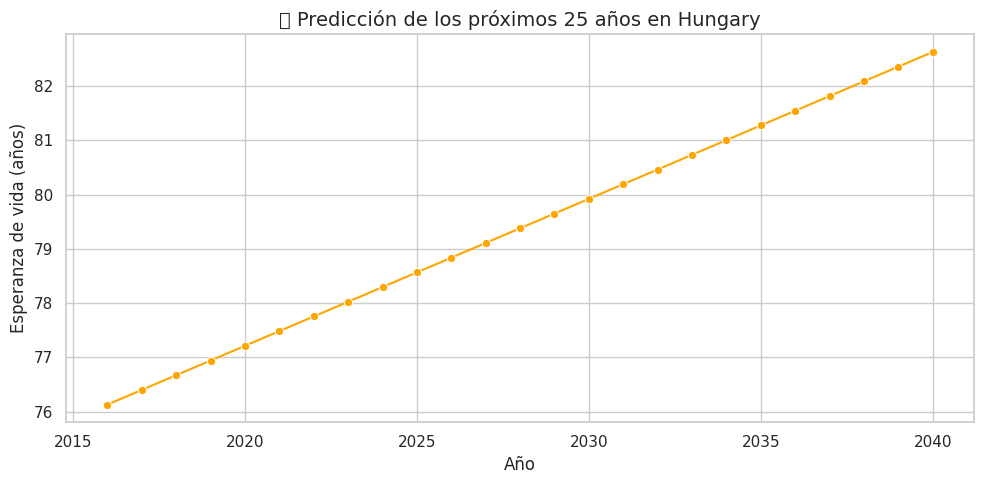

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


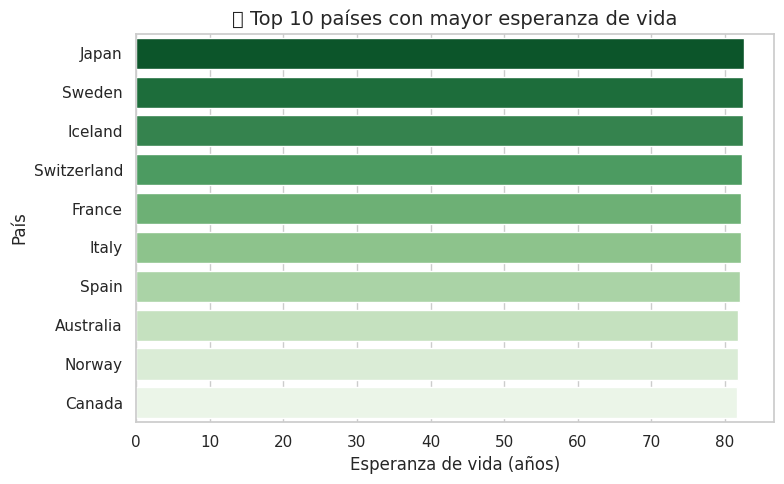

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


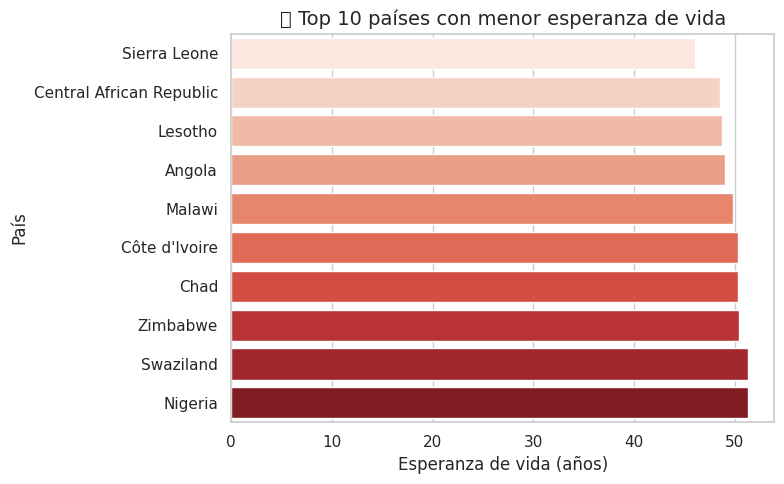

In [8]:
# ✅ Instalar dependencias necesarias (solo la primera vez)
!pip install gradio seaborn scikit-learn --quiet

# ✅ Código de la aplicación
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.linear_model import LinearRegression
import numpy as np

# 🌍 Cargar datos
url = 'https://raw.githubusercontent.com/ramapu12/trabajoFinal/59399a459ba091dfd304faa2e1bdd509b56d5477/Life%20Expectancy%20Data.csv'
df = pd.read_csv(url)
df = df[['Country', 'Year', 'Life expectancy ']].dropna()

paises = sorted(df['Country'].unique())

# 📊 Gráficos Top/Bottom países
def graficos_globales():
    mean_life = df.groupby('Country', as_index=False)['Life expectancy '].mean()
    top = mean_life.sort_values(by='Life expectancy ', ascending=False).head(10)
    bottom = mean_life.sort_values(by='Life expectancy ', ascending=True).head(10)

    sns.set(style='whitegrid')

    fig_top, ax_top = plt.subplots(figsize=(8, 5))
    sns.barplot(x='Life expectancy ', y='Country', data=top, palette='Greens_r', ax=ax_top)
    ax_top.set_title('🟢 Top 10 países con mayor esperanza de vida', fontsize=14)
    ax_top.set_xlabel('Esperanza de vida (años)')
    ax_top.set_ylabel('País')
    plt.tight_layout()

    fig_bottom, ax_bottom = plt.subplots(figsize=(8, 5))
    sns.barplot(x='Life expectancy ', y='Country', data=bottom, palette='Reds', ax=ax_bottom)
    ax_bottom.set_title('🔴 Top 10 países con menor esperanza de vida', fontsize=14)
    ax_bottom.set_xlabel('Esperanza de vida (años)')
    ax_bottom.set_ylabel('País')
    plt.tight_layout()

    return fig_top, fig_bottom

# 🔮 Predicción por país (solo con el año)
def predecir_esperanza(pais):
    data = df[df['Country'] == pais].copy()
    data = data.groupby('Year', as_index=False)['Life expectancy '].mean()

    X = data['Year'].values.reshape(-1, 1)
    y = data['Life expectancy '].values
    model = LinearRegression().fit(X, y)

    future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 26).reshape(-1, 1)
    predictions = model.predict(future_years)

    # Gráfico histórico
    fig1, ax1 = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=data['Year'], y=data['Life expectancy '], marker='o', ax=ax1)
    ax1.set_title(f'📈 Histórico de esperanza de vida en {pais}', fontsize=14)
    ax1.set_ylabel('Esperanza de vida (años)')
    ax1.set_xlabel('Año')
    plt.tight_layout()

    # Gráfico de predicción
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    sns.lineplot(x=future_years.flatten(), y=predictions, marker='o', ax=ax2, color='orange')
    ax2.set_title(f'🔮 Predicción de los próximos 25 años en {pais}', fontsize=14)
    ax2.set_ylabel('Esperanza de vida (años)')
    ax2.set_xlabel('Año')
    plt.tight_layout()

    aumento = predictions[-1] - y[-1]
    tendencia = "aumentará" if aumento > 0 else "disminuirá"
    resumen = (f"📊 En base a la tendencia actual, se estima que la esperanza de vida en **{pais}** "
               f"{tendencia} en aproximadamente **{abs(aumento):.2f} años** en los próximos 25 años.")

    return fig1, fig2, resumen

# 🎨 Interfaz Gradio
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🌍 Comparativa Global de Esperanza de Vida")

    fig_top, fig_bottom = graficos_globales()
    with gr.Row():
        with gr.Column():
            gr.Plot(fig_top)
        with gr.Column():
            gr.Plot(fig_bottom)

    gr.Markdown("---")
    gr.Markdown("## 🔍 Análisis por País")

    with gr.Row():
        pais_input = gr.Dropdown(choices=paises, label="Selecciona un país")

    plot1 = gr.Plot(label="Histórico")
    plot2 = gr.Plot(label="Predicción")
    resumen = gr.Markdown()

    pais_input.change(fn=predecir_esperanza, inputs=pais_input, outputs=[plot1, plot2, resumen])

# 🚀 Ejecutar Gradio
demo.launch(share=True)
